# Task 09 - Support Vector Machines (SVM) for Non-linear Classification
## Pattern Recognition and Machine Learning

In [149]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from svm import *
import numpy as np
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part 1: Kernel SVM
## Test on trivial data

In [150]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

### get_kernel function

In [151]:
K = get_kernel(X, X, {'kernel': 'linear'})
print(K)

[[ 2  3  3 -2 -3 -3]
 [ 3  5  4 -3 -4 -5]
 [ 3  4  5 -3 -5 -4]
 [-2 -3 -3  2  3  3]
 [-3 -4 -5  3  5  4]
 [-3 -5 -4  3  4  5]]


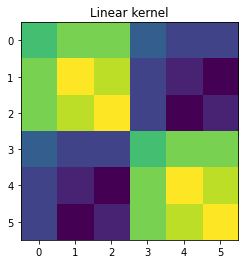

In [152]:
plt.imshow(K, cmap='viridis')
plt.title('Linear kernel');

In [153]:
K = get_kernel(X, X, {'kernel': 'polynomial', 'd': 2})
print(K)

[[ 9 16 16  1  4  4]
 [16 36 25  4  9 16]
 [16 25 36  4 16  9]
 [ 1  4  4  9 16 16]
 [ 4  9 16 16 36 25]
 [ 4 16  9 16 25 36]]


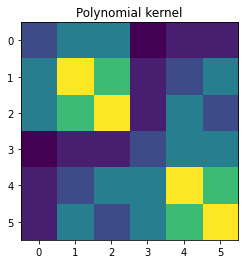

In [154]:
plt.imshow(K, cmap='viridis')
plt.title('Polynomial kernel');

In [155]:
K = get_kernel(X, X, {'kernel': 'rbf', 'sigma': 1.0})
np.set_printoptions(precision=4, suppress=True)
print(K)
np.set_printoptions()

[[1.     0.6065 0.6065 0.0183 0.0015 0.0015]
 [0.6065 1.     0.3679 0.0015 0.0001 0.    ]
 [0.6065 0.3679 1.     0.0015 0.     0.0001]
 [0.0183 0.0015 0.0015 1.     0.6065 0.6065]
 [0.0015 0.0001 0.     0.6065 1.     0.3679]
 [0.0015 0.     0.0001 0.6065 0.3679 1.    ]]


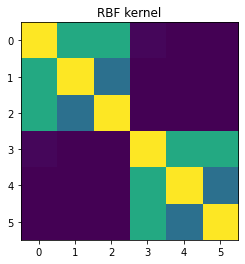

In [156]:
plt.imshow(K, cmap='viridis')
plt.title('RBF kernel');

### The SVM function

In [157]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([-1, 1, 1, 1, -1, -1])
C = float('inf');
options = {'verb': True, 
           't_max': float('inf'),
           'kernel': 'rbf',
           'sigma': 0.02}

In [158]:
model = svm(X, y, C, options)
print(model)

t=1, KKTviol=2.000000, tau=1.000000, tau_lb=0.000000, tau_ub=inf, Q_P=-1.000000
t=2, KKTviol=2.000000, tau=1.000000, tau_lb=0.000000, tau_ub=inf, Q_P=-2.000000
t=3, KKTviol=2.000000, tau=1.000000, tau_lb=0.000000, tau_ub=inf, Q_P=-3.000000
{'sv': array([[ 1,  2,  1, -1, -1, -2],
       [ 1,  1,  2, -1, -2, -1]]), 'y': array([-1,  1,  1,  1, -1, -1]), 'alpha': array([1., 1., 1., 1., 1., 1.]), 'options': {'verb': True, 't_max': inf, 'kernel': 'rbf', 'sigma': 0.02, 'tmax': inf}, 'b': 0.0, 'fun': <function classif_svm at 0x03FEA580>}


In [159]:
classif = classif_svm(X, model)
print(classif)

[-1.  1.  1.  1. -1. -1.]


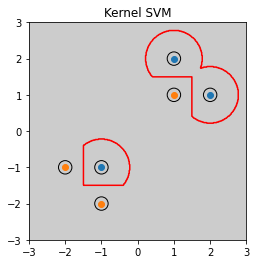

In [160]:
plt.gca().set_aspect("equal")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plot_boundary(plt.gca(), model)
plot_points(X, y)
plt.title('Kernel SVM')
plt.savefig('kernel_svm.png', dpi=300)

## Soft-margin hyperparameter C

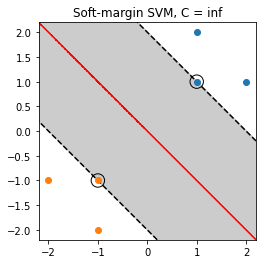

In [165]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([1, 1, 1, -1, -1, -1])
C = np.inf
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
 
model = svm(X, y, C, options)
plot_points(X, y)
plot_boundary(plt.gca(), model)
plt.gca().set_aspect("equal")
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.savefig('example_linear_svm_zero_error.png', dpi=600)

In [ ]:
data = np.load("data_svm1.npz", allow_pickle=True)
X_toy = data["X"]
y_toy = data["y"]

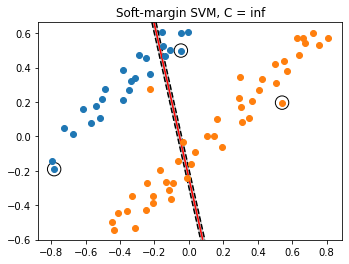

In [ ]:
C = np.inf
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
model = svm(X_toy, y_toy, C, options=options)
plot_points(X_toy, y_toy)
plot_boundary(plt.gca(), model)
plt.gca().set_aspect("equal")
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.savefig('linear_svm_zero_error.png', dpi=600)

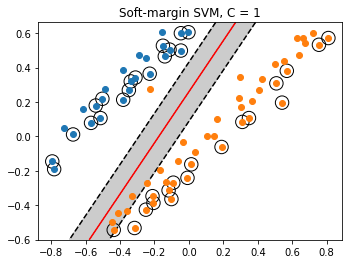

In [ ]:
C = 1
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'linear'}
model = svm(X_toy, y_toy, C, options=options)
plot_points(X_toy, y_toy)
plot_boundary(plt.gca(), model)
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.gca().set_aspect("equal")
plt.savefig('linear_svm.png', dpi=600)

### Interactive C demo

In [ ]:
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(C=(0.001,100.,0.001))
    def soft_margin(C=1):
        model = svm(X_toy, y_toy, C, options={'verb': False,
                                              't_max': float('inf'),
                                              'kernel': 'linear'})
        plt.gca().set_aspect("equal")
        plot_points(X_toy, y_toy)
        plot_boundary(plt.gca(), model)
        plt.title('Soft-margin SVM, C = {}'.format(C));
        
except ImportError:
    print('Optional feature.')

interactive(children=(FloatSlider(value=1.0, description='C', min=0.001, step=0.001), Output()), _dom_classes=…

## Comparing different kernels - test on flower data

In [ ]:
data = np.load("flower.npz", allow_pickle=True)
X = data["X"]
y = data["y"]

### RBF

In [ ]:
C = 10
sigma = 0.1
options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'rbf', 
           'sigma': sigma}
 
model = svm(X, y, C, options)
model['b']
print(model['y'].shape)

(61,)


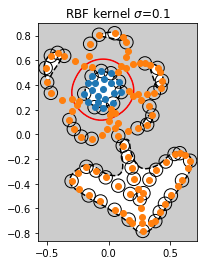

In [ ]:
plot_points(X, y)
plt.title('RBF kernel $\sigma$={}'.format(sigma))
plt.gca().set_aspect("equal")
plot_boundary(plt.gca(), model)
plt.savefig('flower_rbf.png', dpi=300)

### Polynomial

In [ ]:
C = 10000
d = 4
options = {'verb': False, 
           't_max': float('inf'), 
           'kernel': 'polynomial', 
           'd': d}
 
model = svm(X, y, C, options)

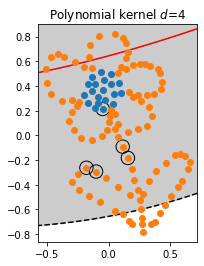

In [ ]:
plot_points(X, y)
plt.gca().set_aspect("equal")
plt.title('Polynomial kernel $d$={}'.format(d))
plot_boundary(plt.gca(), model)
plt.savefig('flower_polynomial.png', dpi=300)

# Part 2: Model selection

In [ ]:
data = np.load("data_svm1_images.npz", allow_pickle=True)
trn_data = data["trn"].item()
tst_data = data["tst"].item()

X_trn, y_trn, norm_trn = compute_measurements_2d(trn_data)
X_tst, y_tst, _ = compute_measurements_2d(tst_data, norm_trn)

In [ ]:
np.random.seed(42)
trn_folds, tst_folds = crossval(y_trn.size, num_folds=4)
Cs = [0.001, 0.1, 1, 10]
ds = [1, 3, 5]
best_params = None
best_err = np.inf
for C in Cs:
    for d in ds:
        options = {'verb': False, 't_max': 100000,
                  'kernel': 'polynomial', 'd': d}
        err = svm_crossvalidation(trn_folds, tst_folds, X_trn, y_trn, C, options)

        if err < best_err:
            best_err = err
            best_params = (C, d)
        print('C {}, d {} -> err {}'.format(C, d, err))

print('best params: C={}, d={}'.format(best_params[0], best_params[1]))

C 0.001, d 1 -> err 0.08666666666666667
C 0.001, d 3 -> err 0.07111111111111111
C 0.001, d 5 -> err 0.19222222222222224
C 0.1, d 1 -> err 0.10444444444444444
C 0.1, d 3 -> err 0.31333333333333335
C 0.1, d 5 -> err 0.24888888888888888
C 1, d 1 -> err 0.12000000000000001
C 1, d 3 -> err 0.31333333333333335
C 1, d 5 -> err 0.24888888888888888
C 10, d 1 -> err 0.12000000000000001
C 10, d 3 -> err 0.31333333333333335
C 10, d 5 -> err 0.24888888888888888
best params: C=0.001, d=3


In [ ]:
C = best_params[0]
d = best_params[1]

options = {'verb': False, 
           't_max': float('inf'),
           'kernel': 'polynomial', 
           'd': d}
model = svm(X_trn, y_trn, C, options)

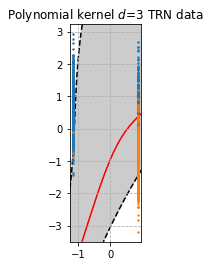

In [ ]:
plot_points(X_trn, y_trn, size=2)
plt.gca().set_aspect("equal")
plt.grid(linestyle='--')
plt.title('Polynomial kernel $d$={} TRN data'.format(d))
plot_boundary(plt.gca(), model, plot_support_vectors=False)
plt.savefig('ocr_polynomial_kernel_trn.png', dpi=300)

In [ ]:
classif = classif_svm(X_tst, model)
err = np.mean(classif != y_tst)
print(err)

0.6


c:\Users\Akande\Downloads\CVUT EECS\CVUT 3 AX WINTER 22 23\RPZ\ASSIGNMENTS\assignment_svm_template\svm.py:493: UserWarning: No contour levels were found within the data range.
  plt.contour(xs, ys, z, [-1, 0, 1], colors=['k', 'r', 'k'], linestyles=['dashed', 'solid', 'dashed'], zorder=zorder)


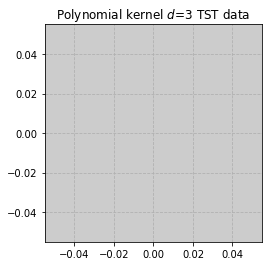

In [ ]:
plt.gca().set_aspect("equal")
plot_points(X_tst, y_tst, size=5)
plt.gca().relim()
plt.grid(linestyle='--')
plt.title('Polynomial kernel $d$={} TST data'.format(d))
plot_boundary(plt.gca(), model, plot_support_vectors=False)
plt.savefig('ocr_polynomial_kernel_tst.png')

c:\Users\Akande\Downloads\CVUT EECS\CVUT 3 AX WINTER 22 23\RPZ\ASSIGNMENTS\assignment_svm_template\svm.py:421: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(im_matrix, cmap=colormap)
c:\Users\Akande\Downloads\CVUT EECS\CVUT 3 AX WINTER 22 23\RPZ\ASSIGNMENTS\assignment_svm_template\svm.py:421: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(im_matrix, cmap=colormap)


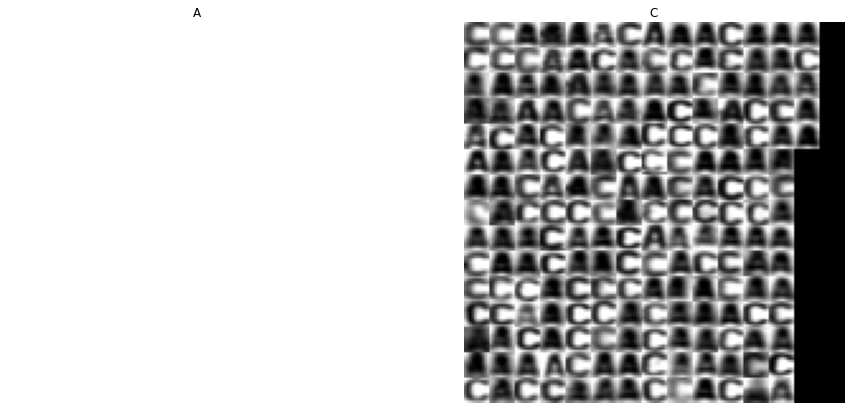

In [ ]:
labels = classif.copy()
labels[labels == 1] = 0
labels[labels == -1] = 1

plt.figure(figsize=(15,10))
show_classification(tst_data['images'], labels, 'AC')
plt.savefig('ocr_svm_classif.png', dpi=300)

# Part 3: Real world example - digit classification

In [ ]:
data = np.load("mnist_trn.npz", allow_pickle=True)
X_trn = data['X']
y_trn = data['y']

In [ ]:
np.random.seed(42)
trn_folds, tst_folds = crossval(y_trn.size, num_folds=5)
sigmas = [0.1, 1, 10, 20, 100, 1000]
Cs = [0.01, 0.1, 1, 10]

best_params = None
best_err = np.inf
for C in Cs:
    for sigma in sigmas:
        options = {'verb': False, 't_max': float('inf'),
                   'kernel': 'rbf', 'sigma': sigma}
        err = svm_crossvalidation(trn_folds, tst_folds, X_trn, y_trn, C, options)

        if err < best_err:
            best_err = err
            best_params = (C, sigma)
        print('C {}, sigma {} -> err {}'.format(C, sigma, err))

print('best params: C={}, sigma={}'.format(best_params[0], best_params[1]))

C 0.01, sigma 0.1 -> err 0.2
C 0.01, sigma 1 -> err 0.10555555555555556
C 0.01, sigma 10 -> err 0.08166666666666667
C 0.01, sigma 20 -> err 0.18944444444444444
C 0.01, sigma 100 -> err 0.05333333333333333
C 0.01, sigma 1000 -> err 0.05333333333333333
C 0.1, sigma 0.1 -> err 0.09
C 0.1, sigma 1 -> err 0.2011111111111111
C 0.1, sigma 10 -> err 0.23944444444444443
C 0.1, sigma 20 -> err 0.14166666666666666
C 0.1, sigma 100 -> err 0.11111111111111112
C 0.1, sigma 1000 -> err 0.057222222222222216
C 1, sigma 0.1 -> err 0.21888888888888886
C 1, sigma 1 -> err 0.2161111111111111
C 1, sigma 10 -> err 0.08944444444444445
C 1, sigma 20 -> err 0.08944444444444445
C 1, sigma 100 -> err 0.2211111111111111
C 1, sigma 1000 -> err 0.2261111111111111
C 10, sigma 0.1 -> err 0.21833333333333332
C 10, sigma 1 -> err 0.2161111111111111
C 10, sigma 10 -> err 0.08944444444444445
C 10, sigma 20 -> err 0.08944444444444445
C 10, sigma 100 -> err 0.2211111111111111
C 10, sigma 1000 -> err 0.2261111111111111
best 

In [ ]:
C = best_params[0]
sigma = best_params[1]

options = {'verb': False, 't_max': float('inf'),
           'kernel': 'rbf', 'sigma': sigma}
model = svm(X_trn, y_trn, C, options)

In [ ]:
data = np.load("mnist_tst.npz", allow_pickle=True)
X_tst = data['X']
y_tst = data['y']

In [ ]:
classif = classif_svm(X_tst, model)
err = np.mean(classif!=y_tst)
print(np.round(err, 8))

ValueError: operands could not be broadcast together with shapes (100,2) (784,) 

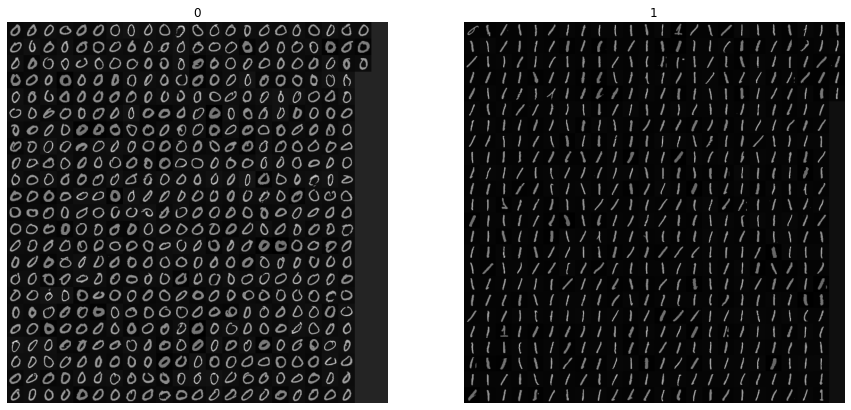

In [ ]:
plt.figure(figsize=(15,10))
show_classification(X_tst.reshape(28,28,-1), classif > 0, '01')
plt.savefig('mnist_tst_classif.png', dpi=300)